# Multiclass Classification

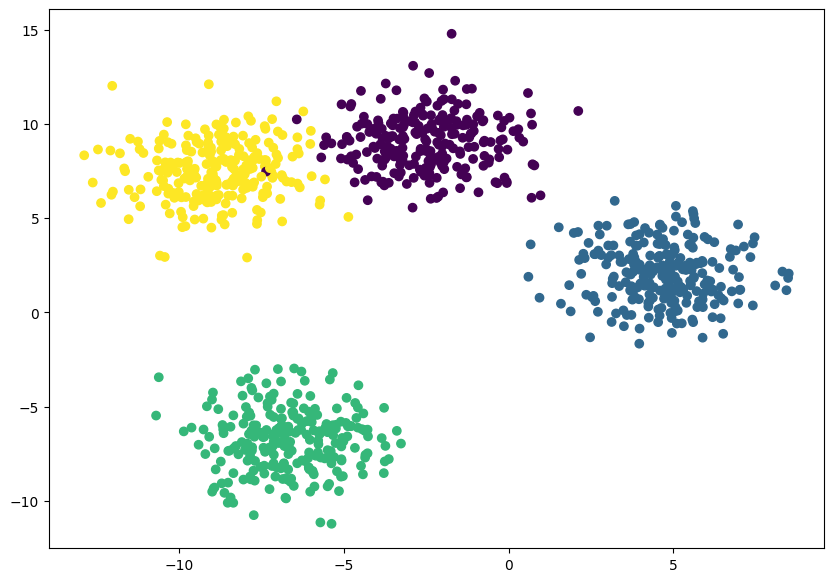

In [28]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Setting a few hyper parameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
N_SAMPLES = 1000

# 1. Create some multicalssdata

X_blob, y_blob = make_blobs(N_SAMPLES,
                            NUM_FEATURES,
                            centers= NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turning data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Train test Split
X_blob_train, X_blob_test,y_blob_train, y_blob_test =  train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.8,
                                                                        random_state=RANDOM_SEED)

# 4. Plotting the data
plt.figure(figsize=(10,7))

plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob)

### Building a multiclass classification model using pytorch

In [11]:
class BlobModel(nn.Module):
    def __init__(self,input_features, output_features, hidden_units = 8):
        """Initialise classificaiton model."""
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(
                in_features= input_features,
                out_features=hidden_units), 
            nn.ReLU(),
            nn.Linear(
                in_features=hidden_units,
                out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(
                in_features=hidden_units, 
                out_features=output_features)
        )
        
    def forward(self,x):
        return self.linear_layer_stack(x)
        

In [13]:
# Create and instance and then try it
model_0 = BlobModel(
    input_features=2,
    output_features=4,
    hidden_units=8
)

# Creating a loss function
loss_fn = nn.CrossEntropyLoss()

# Creating an optimiser
optimiser = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.01
    )

In [29]:
# Logits to prediction 

# Getting the logits
with torch.inference_mode():
    y_logits = model_0(X_blob_train)
    
# Getting the probabiilty
y_pred_probs = torch.softmax(y_logits, dim =1)

# Converting the prediction probs into predictions
y_preds = torch.argmax(y_pred_probs, dim =1)
y_preds[:5]

tensor([2, 2, 2, 2, 2])

In [30]:
# 5. Creating a training and testing loop for this multicalss 
torch.manual_seed(42)

epochs = 1000

for i in range(epochs):
    ### Traing 
    model_0.train()
    
    y_logits = model_0(X_blob_train)
    y_pred = torch.softmax(y_logits,dim = 1).argmax(dim=1)
    
    loss = loss_fn(y_logits, y_blob_train.type(torch.LongTensor))
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
    # Testing code
    model_0.eval()
    
    with torch.inference_mode():
        test_logits = model_0(X_blob_test)
        test_preds = torch.softmax(test_logits,dim = 1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_blob_test)
        
    if i%10 == 0:
        print(f"Epoch: {i:.2f}, Loss: {loss:.2f}, test_loss: {test_loss:.2f}")
    
    

Epoch: 0.00, Loss: 2.16, test_loss: 2.08
Epoch: 10.00, Loss: 1.65, test_loss: 1.62
Epoch: 20.00, Loss: 1.48, test_loss: 1.45
Epoch: 30.00, Loss: 1.38, test_loss: 1.35
Epoch: 40.00, Loss: 1.30, test_loss: 1.28
Epoch: 50.00, Loss: 1.24, test_loss: 1.22
Epoch: 60.00, Loss: 1.18, test_loss: 1.16
Epoch: 70.00, Loss: 1.13, test_loss: 1.10
Epoch: 80.00, Loss: 1.07, test_loss: 1.04
Epoch: 90.00, Loss: 1.02, test_loss: 0.99
Epoch: 100.00, Loss: 0.97, test_loss: 0.94
Epoch: 110.00, Loss: 0.92, test_loss: 0.89
Epoch: 120.00, Loss: 0.86, test_loss: 0.84
Epoch: 130.00, Loss: 0.81, test_loss: 0.79
Epoch: 140.00, Loss: 0.76, test_loss: 0.74
Epoch: 150.00, Loss: 0.71, test_loss: 0.69
Epoch: 160.00, Loss: 0.65, test_loss: 0.64
Epoch: 170.00, Loss: 0.60, test_loss: 0.59
Epoch: 180.00, Loss: 0.55, test_loss: 0.54
Epoch: 190.00, Loss: 0.50, test_loss: 0.49
Epoch: 200.00, Loss: 0.46, test_loss: 0.45
Epoch: 210.00, Loss: 0.41, test_loss: 0.41
Epoch: 220.00, Loss: 0.38, test_loss: 0.37
Epoch: 230.00, Loss: 0

In [31]:
# Make actual predictions

model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_blob_test)
    
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)

y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [32]:
from helper_functions import plot_predictions , plot_decision_boundary, accuracy_fn

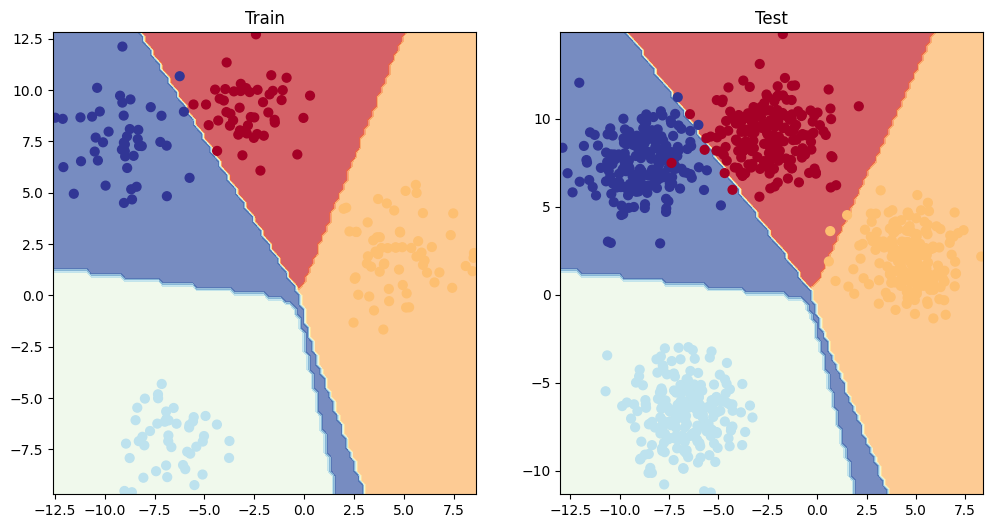

In [34]:
# plotting the results

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)


In [39]:
from torchmetrics import Accuracy

# Setup Metric
torchmetric_accuracy = Accuracy(task="multiclass",num_classes=4)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9900)